# Defect analysis in LLZO

/home/alex/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/alex/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/alex/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/alex/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/alex/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] n

/home/alex/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/alex/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/alex/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/alex/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/alex/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] n

/home/alex/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/alex/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/alex/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/alex/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/alex/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] n

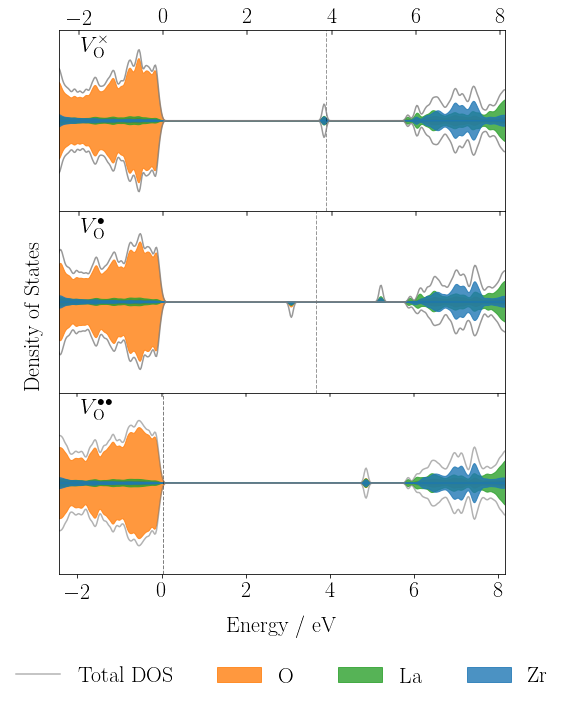

In [4]:
from vasppy.doscar import *
from scipy.ndimage import gaussian_filter1d
import matplotlib.pyplot as plt
import seaborn

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Palatino Linotype'
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 22
plt.rcParams['axes.titlesize'] = 22

Li = range(0,28,1)
La = range(28,40,1)
O = range(48,94,1)
Zr = range(40,48,1)

def scaling(energy,densities,scaling_factor=5,minmax=(0.4,5.3)):
    a = {i:j for i,j in zip(energy,densities)}
    scaled = []
    for i,j in a.items():
        if i > minmax[0] and i < minmax[1]:
            k = j * scaling_factor
            scaled.append(k)
        else: 
            scaled.append(j)
    return scaled



dos_00 = Doscar('../doscars/O_0_DOSCAR', lmax=3)
dos_10 = Doscar('../doscars/O_1_DOSCAR', lmax=3)
dos_20 = Doscar('../doscars/O_2_DOSCAR', lmax=3)

neu_vbm=3.647
scaled_energy = dos_00.energy-3.647

O_up_dos1 = dos_10.pdos_sum(atoms=O,spin='up')
O_down_dos1 = -dos_10.pdos_sum(atoms=O,spin='down')
Li_up_dos1 = dos_10.pdos_sum(atoms=Li,spin='up')
Li_down_dos1 = -dos_10.pdos_sum(atoms=Li,spin='down')
La_up_dos1 = dos_10.pdos_sum(atoms=La,spin='up')
La_down_dos1 = -dos_10.pdos_sum(atoms=La,spin='down')
Zr_up_dos1 = dos_10.pdos_sum(atoms=Zr,spin='up')
Zr_down_dos1 = -dos_10.pdos_sum(atoms=Zr,spin='down')
tot_up1 = Li_up_dos1 + Zr_up_dos1 + O_up_dos1 + La_up_dos1
tot_down1 = Li_down_dos1 + Zr_down_dos1 + O_down_dos1 + La_down_dos1
O_up_dos2 = dos_20.pdos_sum(atoms=O,spin='up')
O_down_dos2 = -dos_20.pdos_sum(atoms=O,spin='down')
Li_up_dos2 = dos_20.pdos_sum(atoms=Li,spin='up')
Li_down_dos2 = -dos_20.pdos_sum(atoms=Li,spin='down')
La_up_dos2 = dos_20.pdos_sum(atoms=La,spin='up')
La_down_dos2 = -dos_20.pdos_sum(atoms=La,spin='down')
Zr_up_dos2 = dos_20.pdos_sum(atoms=Zr,spin='up')
Zr_down_dos2 = -dos_20.pdos_sum(atoms=Zr,spin='down')
tot_up2 = Li_up_dos2 + Zr_up_dos2 + O_up_dos2 + La_up_dos2
tot_down2 = Li_down_dos2 + Zr_down_dos2 + O_down_dos2 + La_down_dos2
O_up_dos0 = dos_00.pdos_sum(atoms=O,spin='up')
O_down_dos0 = -dos_00.pdos_sum(atoms=O,spin='down')
Li_up_dos0 = dos_00.pdos_sum(atoms=Li,spin='up')
Li_down_dos0 = -dos_00.pdos_sum(atoms=Li,spin='down')
La_up_dos0 = dos_00.pdos_sum(atoms=La,spin='up')
La_down_dos0 = -dos_00.pdos_sum(atoms=La,spin='down')
Zr_up_dos0 = dos_00.pdos_sum(atoms=Zr,spin='up')
Zr_down_dos0 = -dos_00.pdos_sum(atoms=Zr,spin='down')
tot_up0 = Li_up_dos0 + Zr_up_dos0 + O_up_dos0 + La_up_dos0
tot_down0 = Li_down_dos0 + Zr_down_dos0 + O_down_dos0 + La_down_dos0
fig, axs = plt.subplots(3,1, figsize = (8,10), sharex=False ) # , gridspec_kw = {'wspace':0, 'hspace':0}
fig.subplots_adjust(hspace=0)
ax = axs[0]

ax.fill_between(scaled_energy,scaling(scaled_energy,gaussian_filter1d(O_up_dos0,2.2),scaling_factor=3), color='C1', alpha=0.8, label = 'O')
ax.fill_between(scaled_energy,scaling(scaled_energy,gaussian_filter1d(O_down_dos0,2.2),scaling_factor=3), color= 'C1', alpha=0.8)
ax.fill_between(scaled_energy,scaling(scaled_energy,gaussian_filter1d(Li_up_dos0,2.2),scaling_factor=3), color = 'C3',alpha=0.8)
ax.fill_between(scaled_energy,scaling(scaled_energy,gaussian_filter1d(Li_down_dos0,2.2),scaling_factor=3), color = 'C3',alpha=0.8)
ax.fill_between(scaled_energy,scaling(scaled_energy,gaussian_filter1d(La_up_dos0,2.2),scaling_factor=3), color= 'C2',alpha=0.8, label = 'La')
ax.fill_between(scaled_energy,scaling(scaled_energy,gaussian_filter1d(La_down_dos0,2.2),scaling_factor=3), color='C2',alpha=0.8)
ax.fill_between(scaled_energy,scaling(scaled_energy,gaussian_filter1d(Zr_up_dos0,2.2),scaling_factor=3), color='C0',alpha=0.8, label='Zr')
ax.fill_between(scaled_energy,scaling(scaled_energy,gaussian_filter1d(Zr_down_dos0,2.2),scaling_factor=3), color='C0',alpha=0.8)
ax.plot(scaled_energy,scaling(scaled_energy,gaussian_filter1d(tot_up0,2),scaling_factor=3), color='grey', alpha =0.8, label='Total DOS')
ax.plot(scaled_energy,scaling(scaled_energy,gaussian_filter1d(tot_down0,2),scaling_factor=3), color='grey', alpha=0.8)
ax.set_xlim(dos_10.efermi - 6.12, dos_10.efermi+4.5)
ax.set_yticks([])
ax.xaxis.tick_top()
ax.xaxis.set_tick_params(labeltop=True)
plt.ylim(-120,120)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_ylim(60,-60)

ax.set_axisbelow(True)
ax.set_axisbelow(True)
ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()
ax.vlines(ymin=ymin, ymax=ymax,x=dos_00.efermi - neu_vbm, facecolor='0.2', alpha=0.4, linestyles='--', linewidth=1)

ax.text(0.05,
        0.85,
        r'$V^{\times}_\mathrm{O}$',
        horizontalalignment='left',
        transform=ax.transAxes)


ax = axs[1]
scaled_energy = dos_10.energy-3.647
ax.fill_between(scaled_energy,scaling(scaled_energy,gaussian_filter1d(O_up_dos1,2.2),scaling_factor=3), color='C1', alpha=0.8, label = 'O')
ax.fill_between(scaled_energy,scaling(scaled_energy,gaussian_filter1d(O_down_dos1,2.2),scaling_factor=3), color= 'C1', alpha=0.8)
ax.fill_between(scaled_energy,scaling(scaled_energy,gaussian_filter1d(Li_up_dos1,2.2),scaling_factor=3), color = 'C3',alpha=0.8)
ax.fill_between(scaled_energy,scaling(scaled_energy,gaussian_filter1d(Li_down_dos1,2.2),scaling_factor=3), color = 'C3',alpha=0.8)
ax.fill_between(scaled_energy,scaling(scaled_energy,gaussian_filter1d(La_up_dos1,2.2),scaling_factor=3), color= 'C2',alpha=0.8, label = 'La')
ax.fill_between(scaled_energy,scaling(scaled_energy,gaussian_filter1d(La_down_dos1,2.2),scaling_factor=3), color='C2',alpha=0.8)
ax.fill_between(scaled_energy,scaling(scaled_energy,gaussian_filter1d(Zr_up_dos1,2.2),scaling_factor=3), color='C0',alpha=0.8, label='Zr')
ax.fill_between(scaled_energy,scaling(scaled_energy,gaussian_filter1d(Zr_down_dos1,2.2),scaling_factor=3), color='C0',alpha=0.8)
ax.plot(scaled_energy,scaling(scaled_energy,gaussian_filter1d(tot_up1,2),scaling_factor=3), color='grey', alpha =0.8, label='Total DOS')
ax.plot(scaled_energy,scaling(scaled_energy,gaussian_filter1d(tot_down1,2),scaling_factor=3), color='grey', alpha=0.8)
ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()
ax.vlines(ymin=ymin, ymax=ymax,x=dos_10.efermi, facecolor='0.2', alpha=0.4, linestyles='--', linewidth=1)
ax.set_xlim(dos_10.efermi - 6.12, dos_10.efermi+4.5)
ax.set_yticks([])
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_ylim(120,-120)
ax.set_axisbelow(True)

ax.text(0.05,
        0.85,
        r'$V^{\bullet}_\mathrm{O}$',
        horizontalalignment='left',
        transform=ax.transAxes)


ax = axs[2]
scaled_energy = dos_20.energy-3.647
ax.fill_between(scaled_energy,scaling(scaled_energy,gaussian_filter1d(O_up_dos2,2.2),scaling_factor=3), color='C1', alpha=0.8, label = 'O')
ax.fill_between(scaled_energy,scaling(scaled_energy,gaussian_filter1d(O_down_dos2,2.2),scaling_factor=3), color= 'C1', alpha=0.8)
ax.fill_between(scaled_energy,scaling(scaled_energy,gaussian_filter1d(Li_up_dos2,2.2),scaling_factor=3), color = 'C3',alpha=0.8)
ax.fill_between(scaled_energy,scaling(scaled_energy,gaussian_filter1d(Li_down_dos2,2.2),scaling_factor=3), color = 'C3',alpha=0.8)
ax.fill_between(scaled_energy,scaling(scaled_energy,gaussian_filter1d(La_up_dos2,2.2),scaling_factor=3), color= 'C2',alpha=0.8, label = 'La')
ax.fill_between(scaled_energy,scaling(scaled_energy,gaussian_filter1d(La_down_dos2,2.2),scaling_factor=3), color='C2',alpha=0.8)
ax.fill_between(scaled_energy,scaling(scaled_energy,gaussian_filter1d(Zr_up_dos2,2.2),scaling_factor=3), color='C0',alpha=0.8, label='Zr')
ax.fill_between(scaled_energy,scaling(scaled_energy,gaussian_filter1d(Zr_down_dos2,2.2),scaling_factor=3), color='C0',alpha=0.8)

ax.plot(scaled_energy,scaling(scaled_energy,gaussian_filter1d(tot_up2,2),scaling_factor=3), color='grey', alpha =0.6, label='Total DOS')
ax.plot(scaled_energy,scaling(scaled_energy,gaussian_filter1d(tot_down2,2),scaling_factor=3), color='grey', alpha =0.6)

ax.text(0.05,
        0.85,
        r'$V^{\bullet\bullet}_\mathrm{O}$',
        horizontalalignment='left',
        transform=ax.transAxes)
plt.ylim(60,-60)
ymin, ymax = ax.get_ylim()


ax.set_axisbelow(True)
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.4),ncol=5,frameon=False)

plt.text(-3.3,-150,'Density of States',rotation='vertical')
plt.xlim(dos_20.efermi - 6.12, dos_20.efermi+4.5)
ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()
ax.vlines(ymin=ymin, ymax=ymax,x=dos_20.efermi - neu_vbm, facecolor='0.2', alpha=0.5, linestyles='--', linewidth=1)
plt.xlabel('Energy / eV',labelpad=15)
ax.set_yticks([])


for tick in axs[0].xaxis.get_ticklocs():
    axs[0].axvline(tick, ymin=0.98, color='dimgrey')
for tick in axs[1].xaxis.get_ticklocs():
    axs[1].axvline(tick, ymin=0.98, color='dimgrey')
for tick in axs[2].xaxis.get_ticklocs():
    axs[2].axvline(tick, ymin=0.98, color='dimgrey')

plt.savefig('../figures/o_v_dos.pdf', bbox_inches='tight')
plt.show() 

### Set up & configuration

In this first cell we import the necessary modules and functions, read in stability region information, and defeine formatting parameters.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fig_params as fp
from tqdm import tqdm
import sc_pyper_functions as scpf # all the bespoke code for this analysis is contained in this script. 
from matplotlib import rc, rcParams
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from fig_params import rcParams

plt.style.use('default')
rcParams.update( fp.master_formatting )

# define colours associated with each defect state to ensure consistency

c_v_li = 'C0'
c_v_o = 'C1'
c_li_i = 'C2'
c_v_la = 'C3'
c_v_zr = 'C4'
c_la_zr = 'C5'
c_zr_la = 'C6'
c_zr_li_o = 'C7'
c_zr_li_t = 'C8'
c_o_i = 'C9'
c_zr_i = 'teal'
c_li_zr = '#9e2767'
c_li_la = '#302f30'
c_la_li = 'gold'

grid = (pd.read_csv('../cplap_out/grid.dat', skiprows=10, sep='\s+'))  # 'grid' refers to a stability region divded into a grid of approximatley 80 points
ex_grid = (pd.read_csv('../cplap_out/ex_grid.dat', skiprows=10, sep='\s+')) # 'ex_grid' refers to a stability region divided into a grid of approximatley 25000 points

## Stability regions with respect to Li, Zr and La as a function of O.

In this next cell, staiblity regions are plotted with respect to oxygen, and each metal. This is acheived by plotting the stability information as plotted in in the `x_grid.dat` files as a scatter plot, and then surrounded with a convex hull.

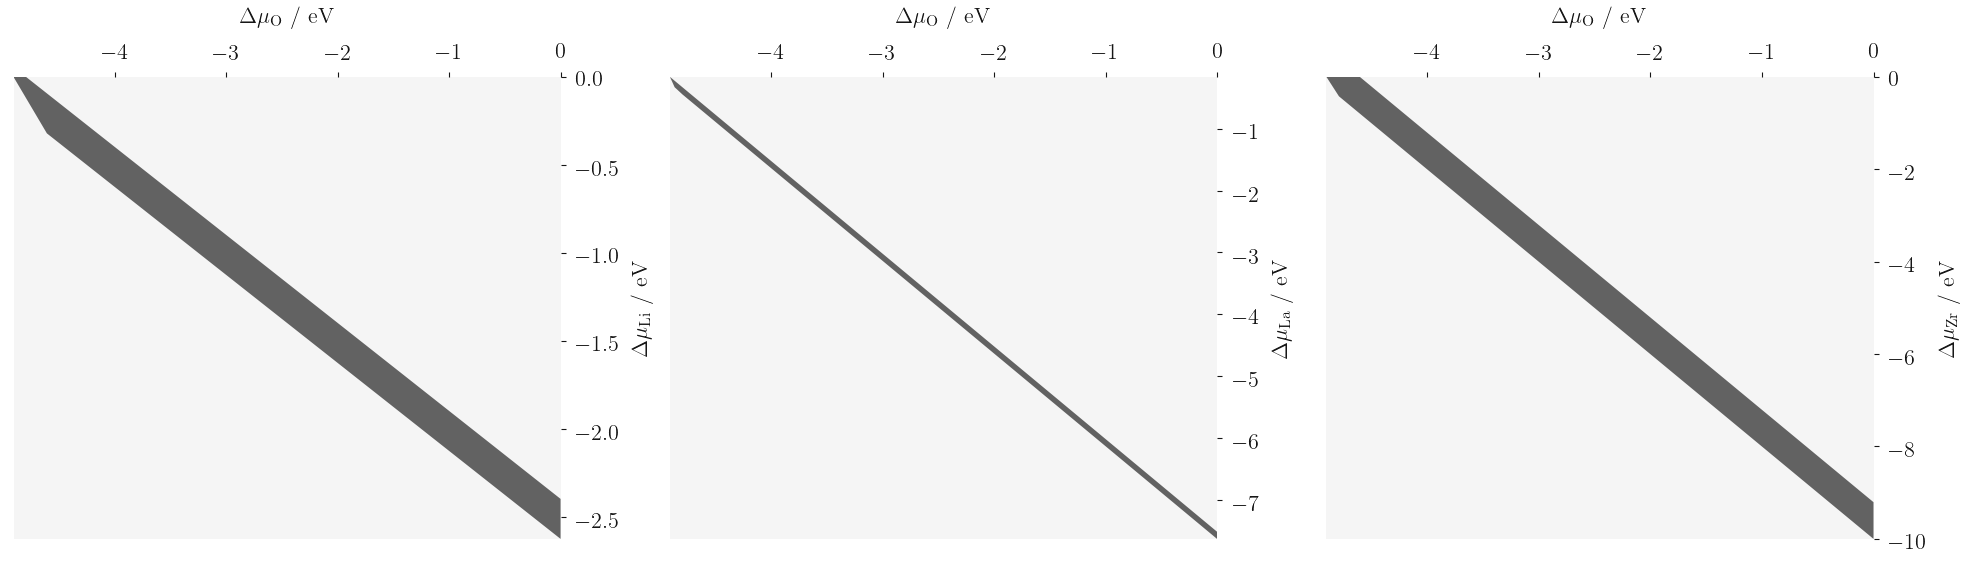

In [6]:
fig, axs = plt.subplots(1,3, figsize =(24,6))

li_plot = axs[0]
la_plot = axs[1]
zr_plot = axs[2]

def stab_ax(x, y, ax):
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.scatter((grid[x]),grid[y],color ='#ffffff', label = ' ', alpha=0)
    scpf.encircle((grid[x]),grid[y],fc="black", ax=ax, alpha = 0.6, label='Li')
    ax.xaxis.tick_top()
    ax.yaxis.tick_right()
    ax.xaxis.set_label_position('top')
    ax.yaxis.set_label_position('right') 
    ax.set_xlim(min(grid[x]),max(grid[x]))
    ax.set_ylim(min(grid[y]),max(grid[y]))

ax = axs[0]
stab_ax('mu_O','mu_Li',ax)
ax.set_ylabel('$\Delta\mu_\mathrm{Li}$ / eV')
ax.set_xlabel('$\Delta\mu_\mathrm{O}$ / eV')

ax = axs[1]
stab_ax('mu_O','mu_La',ax)
ax.set_xlabel('$\Delta\mu_\mathrm{O}$ / eV')
ax.set_ylabel('$\Delta\mu_\mathrm{La}$ / eV')

ax = axs[2]
stab_ax('mu_O','mu_Zr',ax)
ax.set_ylabel('$\Delta\mu_\mathrm{Zr}$ / eV')
ax.set_xlabel('$\Delta\mu_\mathrm{O}$ / eV')

plt.savefig('../figures/stability_region.pdf')
plt.show()

## Defect Chemistry as a function of oxygen chemical potential

For three different reigimes, an O rich, O poor and a moderate O chemical potential reigime as set in examples, we calculate self consistent defect formation energies and transition level diagrams for each of these sets of chemical potentials. Each is plotted with a labelled stability plot illustaing at what chemical potentials these values are calculated at. 

This is acheived by:  
- selecting three different sets of chemical potentials
- reading in the DFT data contained in the `x.yaml` files  
- running `sc_fermi` calculations and scraping out the concentrations using the scripts in `sc_pyper_functions.py`  
- reading in the `transition_levels.dat` file produced by `sc-fermi` and plotting this information 


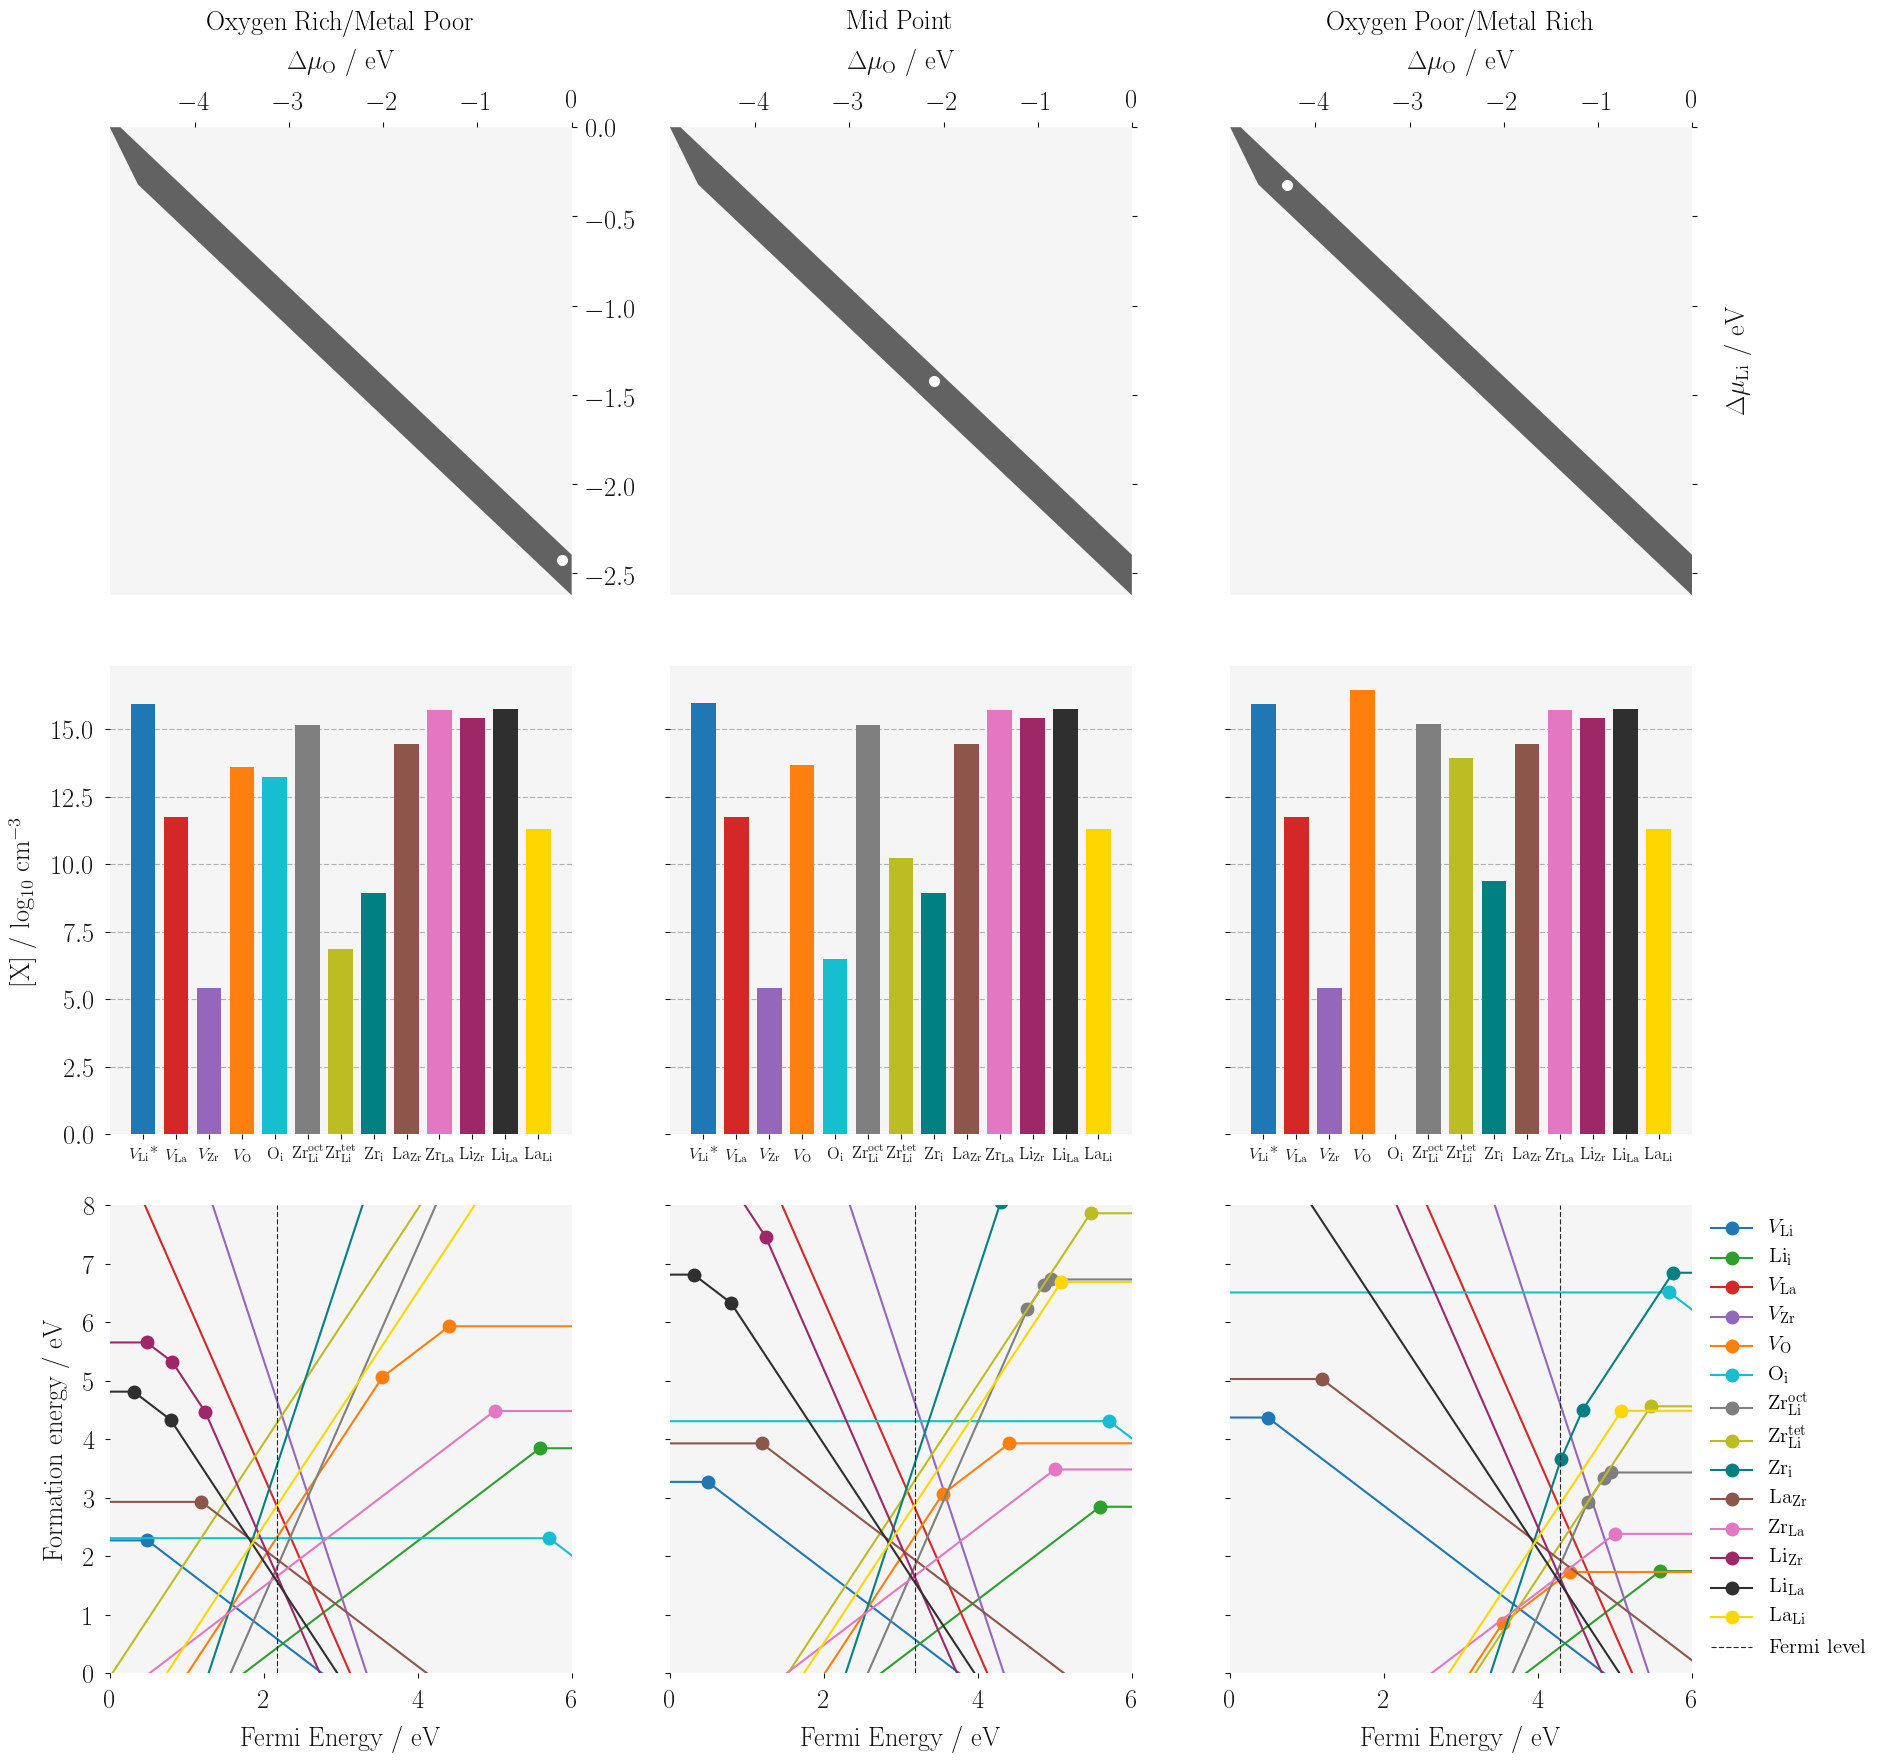

In [17]:
SMALL_SIZE = 19
MEDIUM_SIZE = 15
BIGGER_SIZE = 26

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE)  # fontsize of the figure title

chart_labels= ('$V_\mathrm{Li}$*', '$V_\mathrm{La}$', '$V_\mathrm{Zr}$', '$V_\mathrm{O}$','$\mathrm{O}_\mathrm{i}$',
                   '$\mathrm{Zr}^\mathrm{oct}_\mathrm{Li}$','$\mathrm{Zr}^\mathrm{tet}_\mathrm{Li}$','$\mathrm{Zr}_\mathrm{i}$',
                   '$\mathrm{La}_\mathrm{Zr}$','$\mathrm{Zr}_\mathrm{La}$','$\mathrm{Li}_\mathrm{Zr}$','$\mathrm{Li}_\mathrm{La}$','$\mathrm{La}_\mathrm{Li}$')
chart_labels2= ('$\mathrm{Li}_\mathrm{i}$*', '$V_\mathrm{La}$', '$V_\mathrm{Zr}$', '$V_\mathrm{O}$','$\mathrm{O}_\mathrm{i}$',
                   '$\mathrm{Zr}^\mathrm{oct}_\mathrm{Li}$','$\mathrm{Zr}^\mathrm{tet}_\mathrm{Li}$','$\mathrm{Zr}_\mathrm{i}$',
                   '$\mathrm{La}_\mathrm{Zr}$','$\mathrm{Zr}_\mathrm{La}$','$\mathrm{Li}_\mathrm{Zr}$','$\mathrm{Li}_\mathrm{La}$','$\mathrm{La}_\mathrm{Li}$')
colours = [c_v_li,c_v_la,c_v_zr,c_v_o,c_o_i,c_zr_li_o,c_zr_li_t,c_zr_i,c_la_zr,c_zr_la,c_li_zr,c_li_la,c_la_li]
colours2 = [c_li_i,c_v_la,c_v_zr,c_v_o,c_o_i,c_zr_li_o,c_zr_li_t,c_zr_i,c_la_zr,c_zr_la,c_li_zr,c_li_la,c_la_li]
def wrap_concs(results):
    v_li = (results['v_Li_-1.0'] + results['v_Li_0.0'])
    i_li = (results['Li_i_1.0'] + results['Li_i_0.0'])
    v_la = (results['v_La_-3.0'])
    v_zr = (results['v_Zr_-4.0'])
    v_o = (results['v_O_0.0']+results['v_O_1.0']+results['v_O_2.0'])
    o_i = (results['O_i_0.0']+results['O_i_-1.0'])
    zr_li = (results['Zr_Li_0.0'] + results['Zr_Li_1.0']+results['Zr_Li_2.0']+results['Zr_Li_3.0'])
    zr_li_t = ( results['Zr_Li_tet_0.0'] + results['Zr_Li_tet_1.0']+results['Zr_Li_tet_2.0']+results['Zr_Li_tet_3.0'])
    zr_i = (results['Zr_i_0.0'] + results['Zr_i_1.0'] + results['Zr_i_2.0'] + results['Zr_i_3.0'] + results['Zr_i_4.0'])
    la_zr = (results['La_Zr_0.0'] + results['La_Zr_-1.0'])
    zr_la = (results['Zr_La_0.0'] + results['Zr_La_1.0'])
    li_zr = ( results['Li_Zr_0.0'] + results['Li_Zr_-1.0']+results['Li_Zr_-2.0']+results['Li_Zr_-3.0'])
    li_la = ( results['Li_La_0.0'] + results['Li_La_-1.0']+results['Li_La_-2.0'])
    la_li = ( results['La_Li_0.0'] + results['La_Li_1.0']+results['La_Li_2.0'])
    net_li = (v_li + zr_li - i_li)
    if net_li < 0:
        net_li = net_li*-1
        c_net_li = c_li_i
    else:
        c_net_li = c_v_li
    return {'v_li':v_li,'i_li':i_li,'v_la':v_la,'v_zr':v_zr,'v_o':v_o,'o_i':o_i,'zr_li':zr_li,'zr_li_t':zr_li_t,'zr_i':zr_i,'la_zr':la_zr,'li_zr':li_zr,'li_la':li_la,'la_li':la_li,'net_li':net_li,'zr_la':zr_la}

def plot_tls(transition_levels):
    ax.plot(transition_levels[1]['#'],transition_levels[1]['v_Li'], '-o',label = '$V_\mathrm{Li}$', color= c_v_li, markersize = 9)
    ax.plot(transition_levels[4]['#'],transition_levels[4]['Li_i'], '-o',label = '$\mathrm{Li}_\mathrm{i}$', color=c_li_i, markersize = 9)
    ax.plot(transition_levels[2]['#'],transition_levels[2]['v_La'], '-o',label = '$V_\mathrm{La}$', color=c_v_la, markersize = 9)
    ax.plot(transition_levels[3]['#'],transition_levels[3]['v_Zr'], '-o',label = '$V_\mathrm{Zr}$', color=c_v_zr, markersize = 9)
    ax.plot(transition_levels[0]['#'],transition_levels[0]['v_O'], '-o',label = '$V_\mathrm{O}$', color = c_v_o, markersize = 9)    
    ax.plot(transition_levels[6]['#'],transition_levels[6]['O_i'], '-o',label = '$\mathrm{O_{i}}$', color=c_o_i, markersize = 9)
    ax.plot(transition_levels[9]['#'],transition_levels[9]['Zr_Li'], '-o',label = '$\mathrm{Zr^{oct}_{Li}}$', color=c_zr_li_o, markersize = 9)
    ax.plot(transition_levels[10]['#'],transition_levels[10]['Zr_Li_tet'], '-o',label = '$\mathrm{Zr^{tet}_{Li}}$', color=c_zr_li_t, markersize = 9)
    ax.plot(transition_levels[5]['#'],transition_levels[5]['Zr_i'], '-o' ,label = '$\mathrm{Zr_{i}}$', color=c_zr_i, markersize = 9)
    ax.plot(transition_levels[7]['#'],transition_levels[7]['La_Zr'], '-o',label = '$\mathrm{La_{Zr}}$', color=c_la_zr, markersize = 9)
    ax.plot(transition_levels[8]['#'],transition_levels[8]['Zr_La'], '-o',label = '$\mathrm{Zr_{La}}$', color=c_zr_la, markersize = 9)
    ax.plot(transition_levels[11]['#'],transition_levels[11]['Li_Zr'], '-o',label = '$\mathrm{Li_{Zr}}$', color=c_li_zr, markersize = 9)
    ax.plot(transition_levels[12]['#'],transition_levels[12]['Li_La'], '-o',label = '$\mathrm{Li_{La}}$', color=c_li_la, markersize = 9)
    ax.plot(transition_levels[13]['#'],transition_levels[13]['La_Li'], '-o',label = '$\mathrm{La_{Li}}$', color=c_la_li, markersize = 9)
    ax.vlines(results['Fermi_level'], 0 , 8, color='#262728', zorder = 10, linestyle='--', label='Fermi level', linewidth=0.8)
    ax.set_xlim(0,6)
    ax.set_ylim(0,8)
    ax.set_xlabel('Fermi Energy / eV' )
    plt.tight_layout()

# The values in examples can be varied for other integers between 0 and 82 to investigate different sets of chemical potentials

examples =  (75,12,42)                                       # define three points on the stabilty region grid that represent a low O chemical potential
                                                             # moderate O chemical potential, and high O chemical potential.  
fig, axs = plt.subplots(3,3, figsize =(18,18), sharey='row') # define full figure


# plot stability region for first case    
ax = axs[0,2]
ax.set_title('Oxygen Poor/Metal Rich', pad =70)
stab_ax('mu_O','mu_Li',ax)
ax.set_ylabel('$\Delta\mu_\mathrm{Li}$ / eV', labelpad = 25)
ax.set_xlabel('$\Delta\mu_\mathrm{O}$ / eV')
ax.scatter(grid['mu_O'][examples[0]],grid['mu_Li'][examples[0]], color ='white',zorder=10)
# Calculate defect concentrations
ax = axs[1,2]
ax.grid(axis='y', linestyle='--', zorder =-5)
results = scpf.run_some_fermi(scpf.compile_defects(grid.iloc[examples[0]].to_dict()), # read in chemical potentials from stablity region
                         nelect=544,                                                  # number of electrons in calculation
                         e_gap=5.9034,                                                # bandgap magnitude
                         T=1500,                                                      # temperature
                         spin_polarised=True)                                         # is calculation spin polarised?
# Plot defect concentrations on a bar chart
concs = wrap_concs(results)
defect_concs = np.log10([concs['net_li'],concs['v_la'],concs['v_zr'],concs['v_o'],concs['o_i'],
                         concs['zr_li'],concs['zr_li_t'],concs['zr_i'],concs['la_zr'],concs['zr_la'],
                         concs['li_zr'],concs['li_la'],concs['la_li']])
index = np.arange(len(defect_concs))
ax.bar(index,defect_concs,color=colours,width=0.75)
ax.set_xticks(index)
ax.set_xticklabels(chart_labels, fontsize=12)
ax.set_axisbelow(True)
ax.set_ylim([0,None])
# Read transition levels from sc-fermi output and plot
ax = axs[2,2]
transition_levels = scpf.read_full_transition_levels()
plot_tls(transition_levels)


## Repeat process for other two sets of chemical potentials in examples:
ax = axs[0,0]
ax.set_title('Oxygen Rich/Metal Poor', pad = 70)
stab_ax('mu_O','mu_Li',ax)
ax.set_xlabel('$\Delta\mu_\mathrm{O}$ / eV')
ax.scatter(grid['mu_O'][examples[1]],grid['mu_Li'][examples[1]], color ='white',zorder=10)
ax = axs[1,0]
ax.grid(axis='y', linestyle='--', zorder =-5)
results = scpf.run_some_fermi(scpf.compile_defects(grid.iloc[examples[1]].to_dict()), # read in chemical potentials from stablity region
                         nelect=544,                                                  # number of electrons in calculation
                         e_gap=5.9034,                                                # bandgap magnitude
                         T=1500,                                                      # temperature
                         spin_polarised=True)                                         # is calculation spin polarised?
concs = wrap_concs(results)
defect_concs = np.log10([concs['net_li'],concs['v_la'],concs['v_zr'],concs['v_o'],concs['o_i'],
                         concs['zr_li'],concs['zr_li_t'],concs['zr_i'],concs['la_zr'],concs['zr_la'],
                         concs['li_zr'],concs['li_la'],concs['la_li']])
index = np.arange(len(defect_concs))
ax.bar(index,defect_concs,color=colours,width=0.75)
ax.set_ylabel('[$X$] / log$_{10}$ cm$^{-3}$')
ax.set_xticks(index)
ax.set_xticklabels(chart_labels, fontsize=12)
ax.set_axisbelow(True)
ax.set_ylim([0,None])
ax = axs[2,0]
transition_levels = scpf.read_full_transition_levels()
ax.set_ylabel('Formation energy / eV')
plot_tls(transition_levels)

ax = axs[0,1]
ax.set_title('Mid Point', pad = 70) #\n $\Delta\mu_\mathrm{Li} =$ '+str(round(grid.iloc[examples[2]].to_dict()['mu_Li'],2)) + ' eV, $\Delta\mu_\mathrm{La} =$ '+str(round(grid.iloc[examples[2]].to_dict()['mu_La'],2))+ ' eV, \n $\Delta\mu_\mathrm{Zr} =$ '+str(round(grid.iloc[examples[2]].to_dict()['mu_Zr'],2)) + ' eV, $\Delta\mu_\mathrm{O} =$ '+str(round(grid.iloc[examples[2]].to_dict()['mu_O'],2)) +' eV', pad = 80)
stab_ax('mu_O','mu_Li',ax)
ax.set_xlabel('$\Delta\mu_\mathrm{O}$ / eV')
ax.scatter(grid['mu_O'][examples[2]],grid['mu_Li'][examples[2]], color ='white',zorder=10)
ax = axs[1,1]
ax.grid(axis='y', linestyle='--', zorder =-5)
results = scpf.run_some_fermi(scpf.compile_defects(grid.iloc[examples[2]].to_dict()), # read in chemical potentials from stablity region
                         nelect=544,   # number of electrons in calculation
                         e_gap=5.9034, # bandgap magnitude
                         T=1500,       # temperature
                         spin_polarised=True) # is calculation spin polarised?
concs = wrap_concs(results)
defect_concs = np.log10([concs['net_li'],concs['v_la'],concs['v_zr'],concs['v_o'],concs['o_i'],
                         concs['zr_li'],concs['zr_li_t'],concs['zr_i'],concs['la_zr'],concs['zr_la'],
                         concs['li_zr'],concs['li_la'],concs['la_li']])
index = np.arange(len(defect_concs))
ax.bar(index,defect_concs,color=colours,width=0.75)
ax.set_xticks(index)
ax.set_xticklabels(chart_labels, fontsize=12)
ax.set_axisbelow(True)
ax.set_ylim([0,None])
ax = axs[2,1]
transition_levels = scpf.read_full_transition_levels()
plot_tls(transition_levels)


#final plot and save figure for paper

plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('../figures/chems_plus.pdf',bbox_inches='tight')
plt.show()

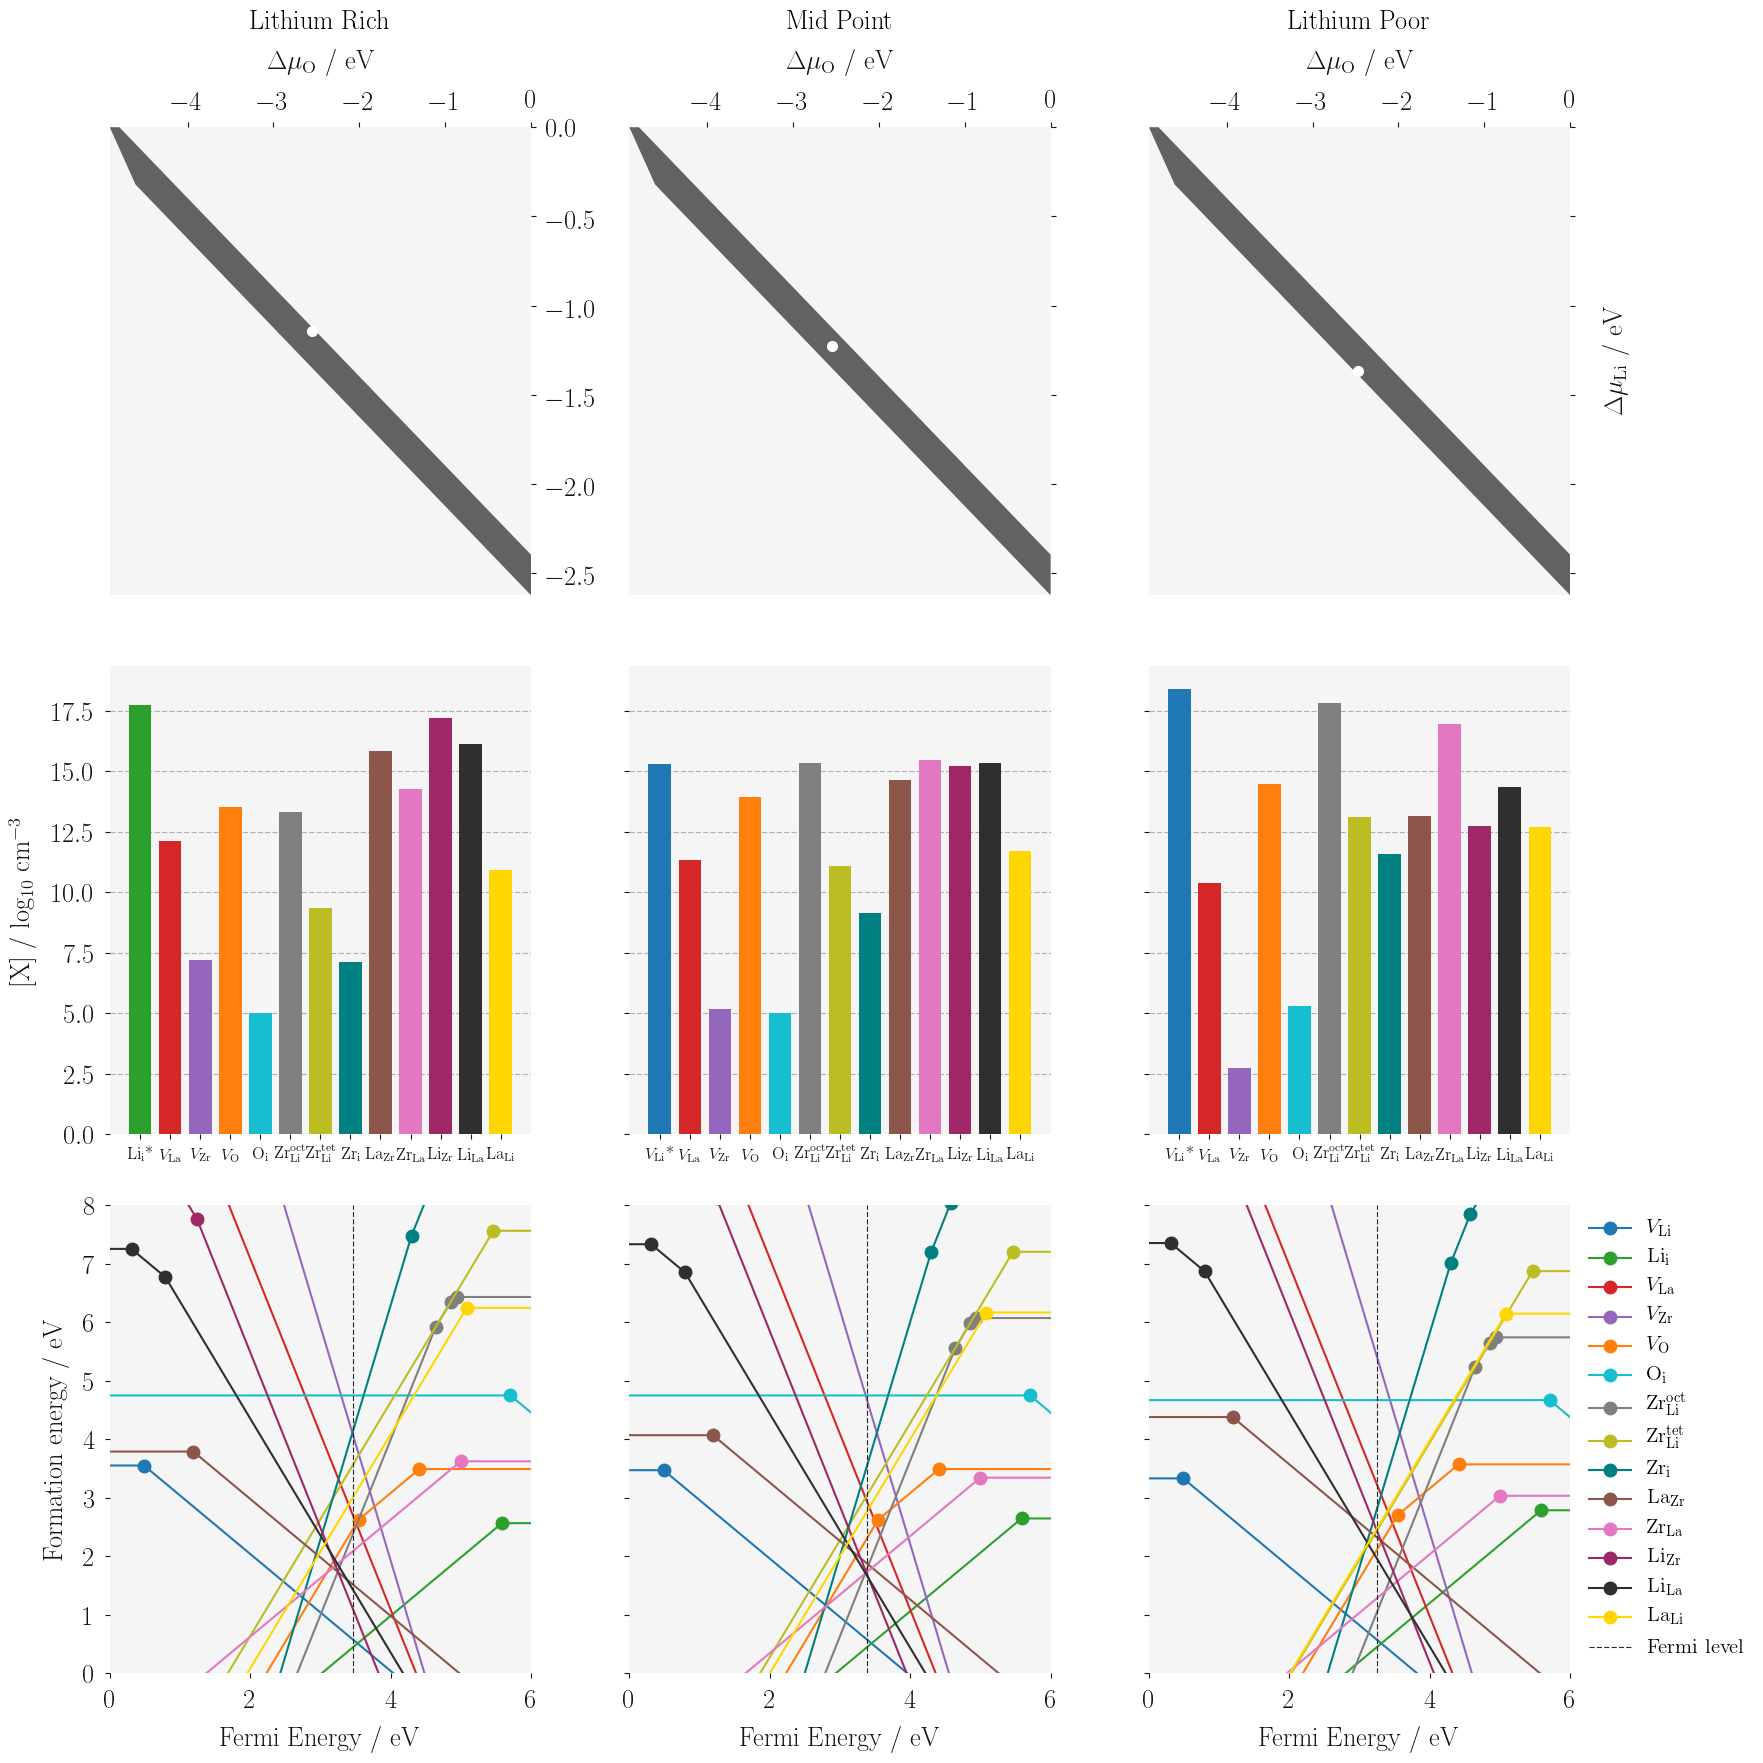

In [23]:
grid = ex_grid

# The values in examples can be varied for other integers between 0 and 82 to investigate different sets of chemical potentials

examples =  (4915,5809,5497) # define three points on the stabilty region ex_grid that represent a low O chemical potential
                       # moderate O chemical potential, and high O chemical potential.  

fig, axs = plt.subplots(3,3, figsize =(18,18), sharey='row') # define full figure
    
# plot stability region for first case    
ax = axs[0,2]
ax.set_title('Lithium Poor', pad =70)
stab_ax('mu_O','mu_Li',ax)
ax.set_ylabel('$\Delta\mu_\mathrm{Li}$ / eV', labelpad=25)
ax.set_xlabel('$\Delta\mu_\mathrm{O}$ / eV')
ax.scatter(grid['mu_O'][examples[0]],grid['mu_Li'][examples[0]], color ='white',zorder=10)
# Calculate defect concentrations
ax = axs[1,2]
ax.grid(axis='y', linestyle='--', zorder =-5)
results = scpf.run_some_fermi(scpf.compile_defects(grid.iloc[examples[0]].to_dict()), # read in chemical potentials from stablity region
                         nelect=544,                                                  # number of electrons in calculation
                         e_gap=5.9034,                                                # bandgap magnitude
                         T=1500,                                                      # temperature
                         spin_polarised=True)                                         # is calculation spin polarised?
# Plot defect concentrations on a bar chart
concs = wrap_concs(results)
defect_concs = np.log10([concs['net_li'],concs['v_la'],concs['v_zr'],concs['v_o'],concs['o_i'],
                         concs['zr_li'],concs['zr_li_t'],concs['zr_i'],concs['la_zr'],concs['zr_la'],
                         concs['li_zr'],concs['li_la'],concs['la_li']])
index = np.arange(len(defect_concs))
ax.bar(index,defect_concs,color=colours,width=0.75)
ax.set_xticks(index)
ax.set_xticklabels(chart_labels, fontsize=12)
ax.set_axisbelow(True)
ax.set_ylim([0,None])
# Read transition levels from sc-fermi output and plot
ax = axs[2,2]
transition_levels = scpf.read_full_transition_levels()
plot_tls(transition_levels)


## Repeat process for other two sets of chemical potentials in examples:
ax = axs[0,0]
ax.set_title('Lithium Rich', pad = 70)
stab_ax('mu_O','mu_Li',ax)
ax.set_xlabel('$\Delta\mu_\mathrm{O}$ / eV')
ax.scatter(grid['mu_O'][examples[1]],grid['mu_Li'][examples[1]], color ='white',zorder=10)
ax = axs[1,0]
ax.grid(axis='y', linestyle='--', zorder =-5)
results = scpf.run_some_fermi(scpf.compile_defects(grid.iloc[examples[1]].to_dict()), # read in chemical potentials from stablity region
                         nelect=544,                                                  # number of electrons in calculation
                         e_gap=5.9034,                                                # bandgap magnitude
                         T=1500,                                                      # temperature
                         spin_polarised=True)                                         # is calculation spin polarised?
concs = wrap_concs(results)
defect_concs = np.log10([concs['net_li'],concs['v_la'],concs['v_zr'],concs['v_o'],concs['o_i'],
                         concs['zr_li'],concs['zr_li_t'],concs['zr_i'],concs['la_zr'],concs['zr_la'],
                         concs['li_zr'],concs['li_la'],concs['la_li']])
index = np.arange(len(defect_concs))
ax.set_ylabel('[$X$] / log$_{10}$ cm$^{-3}$')
ax.bar(index,defect_concs,color=colours2,width=0.75)
ax.set_xticks(index)
ax.set_xticklabels(chart_labels2, fontsize=12)
ax.set_axisbelow(True)
ax.set_ylim([0,None])
ax = axs[2,0]
transition_levels = scpf.read_full_transition_levels()
ax.set_ylabel('Formation energy / eV')
plot_tls(transition_levels)

ax = axs[0,1]
ax.set_title('Mid Point', pad = 70) #\n $\Delta\mu_\mathrm{Li} =$ '+str(round(grid.iloc[examples[2]].to_dict()['mu_Li'],2)) + ' eV, $\Delta\mu_\mathrm{La} =$ '+str(round(grid.iloc[examples[2]].to_dict()['mu_La'],2))+ ' eV, \n $\Delta\mu_\mathrm{Zr} =$ '+str(round(grid.iloc[examples[2]].to_dict()['mu_Zr'],2)) + ' eV, $\Delta\mu_\mathrm{O} =$ '+str(round(grid.iloc[examples[2]].to_dict()['mu_O'],2)) +' eV', pad = 80)
stab_ax('mu_O','mu_Li',ax)
ax.set_xlabel('$\Delta\mu_\mathrm{O}$ / eV')
ax.scatter(grid['mu_O'][examples[2]],grid['mu_Li'][examples[2]], color ='white',zorder=10)
ax = axs[1,1]
ax.grid(axis='y', linestyle='--', zorder =-5)
results = scpf.run_some_fermi(scpf.compile_defects(grid.iloc[examples[2]].to_dict()), # read in chemical potentials from stablity region
                         nelect=544,   # number of electrons in calculation
                         e_gap=5.9034, # bandgap magnitude
                         T=1500,       # temperature
                         spin_polarised=True) # is calculation spin polarised?
concs = wrap_concs(results)
defect_concs = np.log10([concs['net_li'],concs['v_la'],concs['v_zr'],concs['v_o'],concs['o_i'],
                         concs['zr_li'],concs['zr_li_t'],concs['zr_i'],concs['la_zr'],concs['zr_la'],
                         concs['li_zr'],concs['li_la'],concs['la_li']])
index = np.arange(len(defect_concs))
ax.bar(index,defect_concs,color=colours,width=0.75)
ax.set_xticks(index)
ax.set_xticklabels(chart_labels, fontsize=12)
ax.set_axisbelow(True)
ax.set_ylim([0,None])
ax = axs[2,1]
transition_levels = scpf.read_full_transition_levels()
plot_tls(transition_levels)


#final plot and save figure for paper

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('../figures/chems_plus_li.pdf',bbox_inches='tight')
plt.tight_layout()
plt.show()

## Lithium off-stoichiometry

Calculating lithium content over chemical potential space. The stability region chemical potential grid (as outputted from CPLAP) is looped over, and defect concentrations calculated for each point. The defects that directly effect lithium content are considered to determine off-stoichiometry. Note that there is no guarntee that all lithium content forms a part of the wider lithium conduction network. The cell will print the maximum and minimum lithium content per calculation cell for the given calcualtion inputs

In [7]:
all_concs = [scpf.run_some_fermi(scpf.compile_defects(ex_grid.iloc[i].to_dict()), # read in chemical potentials from stablity region
                          nelect=544,                                               # number of electrons in calculation
                          e_gap=5.9034,                                             # bandgap magnitude
                          T=1500,                                                   # temperature
                          spin_polarised=True) for i in tqdm(range(ex_grid.shape[0]))]
net_li = np.array([(i['v_Li_0.0']+i['v_Li_-1.0']+i['Zr_Li_0.0']+i['Zr_Li_1.0']+i['Zr_Li_2.0']+i['Zr_Li_3.0']+i['Zr_Li_tet_0.0']+i['Zr_Li_tet_1.0']+i['Zr_Li_tet_2.0']+i['Zr_Li_tet_3.0']+i['La_Li_0.0']+i['La_Li_1.0']+i['La_Li_2.0'])-
                    (i['Li_i_0.0']+i['Li_i_1.0']+i['Li_Zr_0.0']+i['Li_Zr_-1.0']+i['Li_Zr_-2.0']+i['Li_Zr_-3.0']+i['Li_La_0.0']+i['Li_La_-1.0']+i['Li_La_-2.0']) for i in all_concs])
print(scpf.off_stoich(max(net_li)))
print(scpf.off_stoich(min(net_li)))

100%|██████████| 10457/10457 [25:53<00:00,  5.44it/s]

0.020659499132517776
-0.005322399303178612


100%|██████████| 370/370 [02:16<00:00,  2.77it/s]
/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in log10


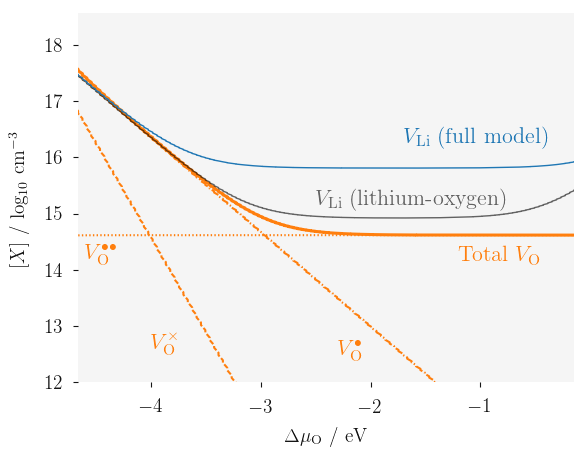

In [22]:
unique_O=ex_grid[10:-2].groupby('mu_La').min().reset_index()

from scipy.interpolate import UnivariateSpline


SMALL_SIZE = 14
MEDIUM_SIZE = 26
BIGGER_SIZE = 26

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE)  # fontsize of the figure title


full_model =[]
schottky_model =[]
for i in tqdm(range(unique_O.shape[0])):
    results = scpf.run_some_fermi(scpf.compile_defects(unique_O.iloc[i].to_dict()), # read in chemical potentials from stablity region
                         nelect=544, # number of electrons in calculation
                         e_gap=5.9034, # bandgap magnitude
                         T=1500,       # temperature
                         spin_polarised=True) # is calculation spin polarised?
    full_model.append(results)
    results = scpf.run_some_fermi(scpf.compile_defects(unique_O.iloc[i].to_dict(), schottky=True), # read in chemical potentials from stablity region
                         nelect=544, # number of electrons in calculation
                         e_gap=5.9034, # bandgap magnitude
                         T=1500,       # temperature
                         spin_polarised=True) # is calculation spin polarised?
    schottky_model.append(results)
    
li_v_0_f = [i['v_Li_0.0'] for i in full_model]
li_v_1_f = [i['v_Li_-1.0'] for i in full_model]
li_v_f = np.array(li_v_0_f) + np.array(li_v_1_f)
li_i_0_f = [i['Li_i_0.0'] for i in full_model]
li_i_1_f = [i['Li_i_1.0'] for i in full_model]
li_i_f = np.array(li_i_0_f) + np.array(li_i_1_f)
o_v_0_f = [i['v_O_0.0'] for i in full_model]
o_v_1_f = [i['v_O_1.0'] for i in full_model]
o_v_2_f = [i['v_O_2.0'] for i in full_model]
o_v_t_f = np.log10(np.array(o_v_0_f)+np.array(o_v_1_f)+np.array(o_v_2_f))
o_v_0_f = np.log10(o_v_0_f)
o_v_1_f = np.log10(o_v_1_f)
o_v_2_f = np.log10(o_v_2_f)
full_v_li = li_v_f - li_i_f
x = pd.Series(np.log10(full_v_li))

li_v_0_s = [i['v_Li_0.0'] for i in schottky_model]
li_v_1_s = [i['v_Li_-1.0'] for i in schottky_model]
li_v_s = np.array(li_v_0_s) + np.array(li_v_1_s)
li_i_0_s = [i['Li_i_0.0'] for i in schottky_model]
li_i_1_s = [i['Li_i_1.0'] for i in schottky_model]
li_i_s = np.array(li_i_0_s) + np.array(li_i_1_s)
s_v_li = (li_v_s - li_i_s)
y = pd.Series(np.log10(s_v_li))

plt.plot(unique_O['mu_O'],pd.Series(o_v_t_f).rolling(3).mean(), color = c_v_o, lw =2.2)
plt.plot(unique_O['mu_O'],pd.Series(o_v_0_f).rolling(3).mean(), color = 'C1',ls ='--',label = r'$V^{\times}_\mathrm{O}$')
plt.plot(unique_O['mu_O'],pd.Series(o_v_1_f).rolling(3).mean(), color = 'C1', ls = '-.', label = r'$V^{\bullet}_\mathrm{O}$')
plt.plot(unique_O['mu_O'],pd.Series(o_v_2_f).rolling(3).mean(), color = 'C1', ls =':', label = r'$V^{\bullet\bullet}_\mathrm{O}$')
plt.plot(unique_O['mu_O'], y.rolling(3).mean(), color='black', alpha=0.6, label = '$V_\mathrm{O}/V_\mathrm{Li}$', lw =1)
plt.plot(unique_O['mu_O'], x.rolling(3).mean(), label = 'all defects', lw=1)

plt.xlabel('$\Delta\mu_\mathrm{O}$ / eV')
plt.ylabel('[$X$] / log$_{10}$ cm$^{-3}$')
plt.ylim(12,None)
plt.xlim(unique_O['mu_O'][350],unique_O['mu_O'][10])

plt.text(-2.3,12.4, r'$V^{\bullet}_\mathrm{O}$', color = 'C1', fontsize=16)
plt.text(-4,12.5, r'$V^{\times}_\mathrm{O}$', color = 'C1', fontsize=16)
plt.text(-4.6,14.1, r'$V^{\bullet\bullet}_\mathrm{O}$', color = 'C1', fontsize=16)
plt.text(-1.2,14.1, r'Total $V_\mathrm{O}$', color = 'C1', fontsize=16)
plt.text(-2.5,15.1, r'$V_\mathrm{Li}$ (lithium-oxygen)',color='black', alpha=0.6, fontsize=16)
plt.text(-1.7,16.2, r'$V_\mathrm{Li}$ (full model)', color = 'C0', fontsize=16)
plt.savefig('../figures/model_concs.pdf')
plt.show()

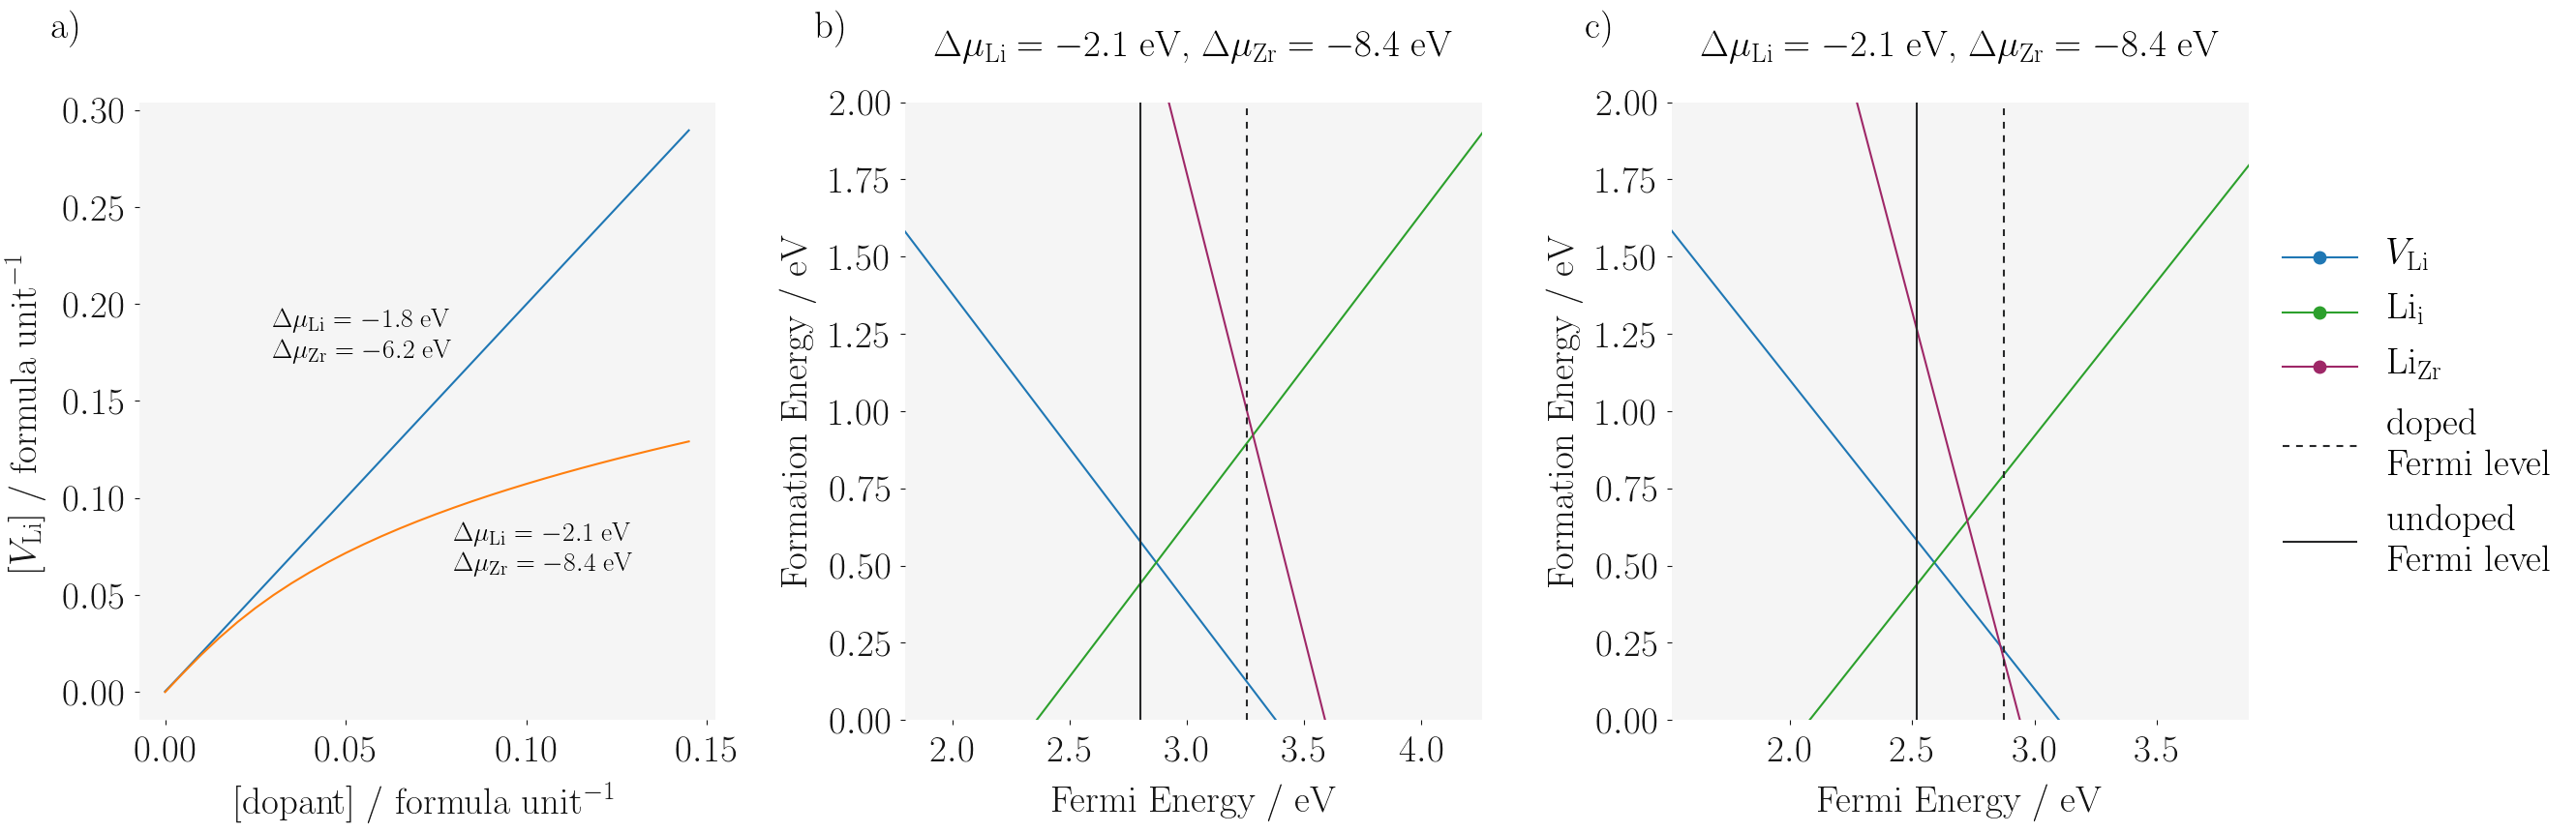

In [24]:
fig, axs = plt.subplots(1,3, figsize =(24,9))


SMALL_SIZE = 28
MEDIUM_SIZE = 26
BIGGER_SIZE = 26

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE)  # fontsize of the figure title



ax = axs[0]
dopant_levels = np.arange(0.00,0.15,0.005)
full_model = []
for i in dopant_levels:
    results = scpf.run_some_frozen_fermi(scpf.compile_defects(ex_grid.iloc[3000].to_dict()), # read in chemical potentials from stablity region
                         nelect=544, # number of electrons in calculation
                         e_gap=5.9034, # bandgap magnitude
                         T=1500,       # temperature
                         dopant_chg=int(2), dopant_conc=float(scpf.per_form_un(i)), # dopant charge and concentration
                         spin_polarised=True) # is calculation spin polarised?
    full_model.append(results)
net_li_full = np.array([(i['v_Li_0.0']+i['v_Li_-1.0'])-(i['Li_i_0.0']+i['Li_i_1.0']) for i in full_model])
ax.plot(dopant_levels,scpf.off_stoich(net_li_full)/8, label = 'all defects', color='C0')
ax.set_ylabel('[$V_\mathrm{Li}]$ / \n formula unit$^{-1}$')
ax.set_xlabel('[dopant] / formula unit$^{-1}$')

ax = axs[1]
ax.text(-0.1, 1.15, 'b)', transform=ax.transAxes, fontweight='bold',va='top', ha='right')
scpf.run_some_fermi(scpf.compile_defects(ex_grid.iloc[3000].to_dict()), # read in chemical potentials from stablity region
                    nelect=544, # number of electrons in calculation
                    e_gap=5.9034, # bandgap magnitude
                    T=1500,       # temperature
                    spin_polarised=True) # is calculation spin polarised?
transition_levels = scpf.read_full_transition_levels()
ax.plot(transition_levels[1]['#'],transition_levels[1]['v_Li'], '-o',label = '$V_\mathrm{Li}$', color= c_v_li, markersize = 9, alpha=1)
ax.plot(transition_levels[4]['#'],transition_levels[4]['Li_i'], '-o',label = '$\mathrm{Li}_\mathrm{i}$', color=c_li_i, markersize = 9, alpha=1)
ax.plot(transition_levels[11]['#'],transition_levels[11]['Li_Zr'], '-o',label = '$\mathrm{Li_{Zr}}$', color=c_li_zr, markersize = 9, alpha=1)
ax.set_xlim(full_model[0]['Fermi_level']-1,full_model[-1]['Fermi_level']+1)
ax.set_ylim(0,2)
ax.set_ylabel('Formation Energy / eV')
ax.set_xlabel('Fermi Energy / eV' )
ax.vlines(full_model[0]['Fermi_level'], 0 , 8, color='#262728', zorder = 10, label='undoped \n Fermi level')
ax.plot((full_model[-1]['Fermi_level'],full_model[-1]['Fermi_level']),(0,2), ls='--', color='#262728', zorder = 10, dashes=(5, 5), label='doped \n Fermi level')
ax.set_title('$\Delta\mu_\mathrm{Li} = -2.1~\mathrm{eV}$, $\Delta\mu_\mathrm{Zr} = -8.4~\mathrm{eV}$')
plt.tight_layout()

ax = axs[0]
full_model = []
for i in dopant_levels:
    results = scpf.run_some_frozen_fermi(scpf.compile_defects(ex_grid.iloc[1730].to_dict()), # read in chemical potentials from stablity region
                         nelect=544, # number of electrons in calculation
                         e_gap=5.9034, # bandgap magnitude
                         T=1500,       # temperature
                         dopant_chg=int(2), dopant_conc=float(scpf.per_form_un(i)), # dopant charge and concentration
                         spin_polarised=True) # is calculation spin polarised?
    full_model.append(results)

net_li_full = np.array([(i['v_Li_0.0']+i['v_Li_-1.0'])-(i['Li_i_0.0']+i['Li_i_1.0']) for i in full_model])
ax = axs[0]
scpf.run_some_fermi(scpf.compile_defects(ex_grid.iloc[1730].to_dict()), # read in chemical potentials from stablity region
                    nelect=544, # number of electrons in calculation
                    e_gap=5.9034, # bandgap magnitude
                    T=1500,       # temperature
                    spin_polarised=True) # is calculation spin polarised?
ax.text(-0.1, 1.15, 'a)', transform=ax.transAxes, fontweight='bold',va='top', ha='right')
ax.plot(dopant_levels,scpf.off_stoich(net_li_full)/8, color='C1')
ax.set_ylabel('[$V_\mathrm{Li}]$ / formula unit$^{-1}$',rotation = 90)
ax.set_xlabel('[dopant] / formula unit$^{-1}$')
#ax.legend()
ax.text(0.03,0.17,'$\Delta\mu_\mathrm{Li} = -1.8~\mathrm{eV}$ \n $\Delta\mu_\mathrm{Zr} = -6.2~\mathrm{eV}$ ', fontsize='20')
ax.text(0.08,0.06,'$\Delta\mu_\mathrm{Li} = -2.1~\mathrm{eV}$ \n $\Delta\mu_\mathrm{Zr} = -8.4~\mathrm{eV}$ ', fontsize='20')

ax = axs[2]
ax.text(-0.1, 1.15, 'c)', transform=ax.transAxes, fontweight='bold',va='top', ha='right')
transition_levels = scpf.read_full_transition_levels()
ax.plot(transition_levels[1]['#'],transition_levels[1]['v_Li'], '-o',label = '$V_\mathrm{Li}$', color= c_v_li, markersize = 9, alpha=1)
ax.plot(transition_levels[4]['#'],transition_levels[4]['Li_i'], '-o',label = '$\mathrm{Li}_\mathrm{i}$', color=c_li_i, markersize = 9, alpha=1)
ax.plot(transition_levels[11]['#'],transition_levels[11]['Li_Zr'], '-o',label = '$\mathrm{Li_{Zr}}$', color=c_li_zr, markersize = 9, alpha=1)
ax.set_xlim(full_model[0]['Fermi_level']-1,full_model[-1]['Fermi_level']+1)
ax.set_ylim(0,2)
ax.set_ylabel('Formation Energy / eV')
ax.set_xlabel('Fermi Energy / eV' )
ax.vlines(full_model[0]['Fermi_level'], 0 , 8, color='#262728', zorder = 10, label='undoped \n Fermi level')
ax.plot((full_model[-1]['Fermi_level'],full_model[-1]['Fermi_level']),(0,2), ls='--', color='#262728', zorder = 10, dashes=(5, 5), label='doped \n Fermi level')
ax.set_title('$\Delta\mu_\mathrm{Li} = -2.1~\mathrm{eV}$, $\Delta\mu_\mathrm{Zr} = -8.4~\mathrm{eV}$')
plt.tight_layout()



plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.savefig('../figures/dopants.pdf', facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()




100%|██████████| 1518/1518 [06:42<00:00,  3.50it/s]


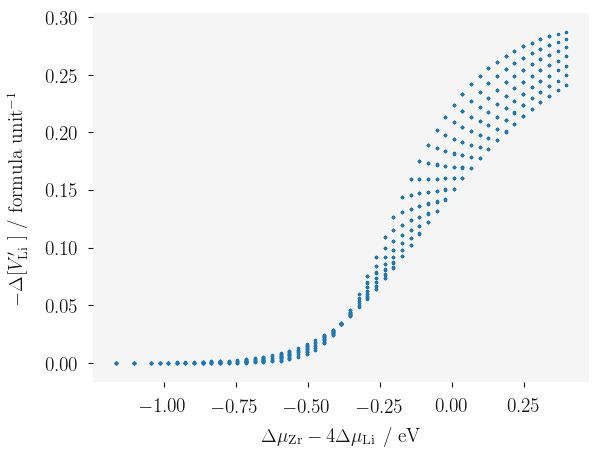

In [26]:
indexes = []
temps = []
chem_pots = []

SMALL_SIZE = 14
MEDIUM_SIZE = 26
BIGGER_SIZE = 26

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE)  # fontsize of the figure title

temperatures = np.arange(800,1500,100) # range of temperatures LLZO is likely to be synthesised over
for temp in tqdm(temperatures):
     mu_o = scpf.dependance(1e-10, temp)    # calculate oxygen chemical potential based of temperature and pressure 
     for i in range(ex_grid.shape[0]):
         if round(mu_o,1) == round(ex_grid['mu_O'][i],1):
             indexes.append(i)
             temps.append(temp)
            
chem_pots = [ex_grid.iloc[i].to_dict() for i in indexes]
chots = ex_grid.iloc[i].to_dict()

dopant_levels = np.arange(0.15)
full_model = []
schottky_model = []
for i,t in zip(tqdm(chem_pots),temps):
    chesults = scpf.run_some_frozen_fermi(scpf.compile_defects(i), # read in chemical potentials from stablity region
                         nelect=544, # number of electrons in calculation
                         e_gap=5.9034, # bandgap magnitude
                         T=t,       # temperature
                         dopant_chg=int(2), dopant_conc=float(scpf.per_form_un(0.15)), # 5dopant charge and concentration
                         spin_polarised=True) # is calculation spin polarised?
    full_model.append(chesults)
    net_li_full = np.array([(i['v_Li_0.0']+i['v_Li_-1.0'])-(i['Li_i_0.0']+i['Li_i_1.0']) for i in full_model])
    results = scpf.run_some_frozen_fermi(scpf.compile_defects(i, schottky=True), # read in chemical potentials from stablity region
                         nelect=544, # number of electrons in calculation
                         e_gap=5.9034, # bandgap magnitude
                         T=t,       # temperature
                         dopant_chg=int(2), dopant_conc=float(scpf.per_form_un(0.15)), # dopant charge and concentration
                         spin_polarised=True) # is calculation spin polarised?
    schottky_model.append(results)
    net_li_sc = np.array([(i['v_Li_0.0']+i['v_Li_-1.0'])-(i['Li_i_0.0']+i['Li_i_1.0']) for i in schottky_model])    

li = [i['mu_Li'] for i in chem_pots]
zr = [i['mu_Zr'] for i in chem_pots]  
a = ((scpf.off_stoich(np.array(net_li_sc))/8 - scpf.off_stoich(np.array(net_li_full)/8)))
pos = np.array([ 4*np.array(li) -  np.array(zr) ])
plt.scatter(pos,a,s=2)
plt.ylabel( '$-\Delta[ V^\prime_\mathrm{Li}$ ] / formula unit$^{-1}$')
plt.xlabel('$\Delta\mu_\mathrm{Zr} - 4\Delta\mu_\mathrm{Li}$ / eV')
plt.savefig('../figures/scatter_deviation.pdf')

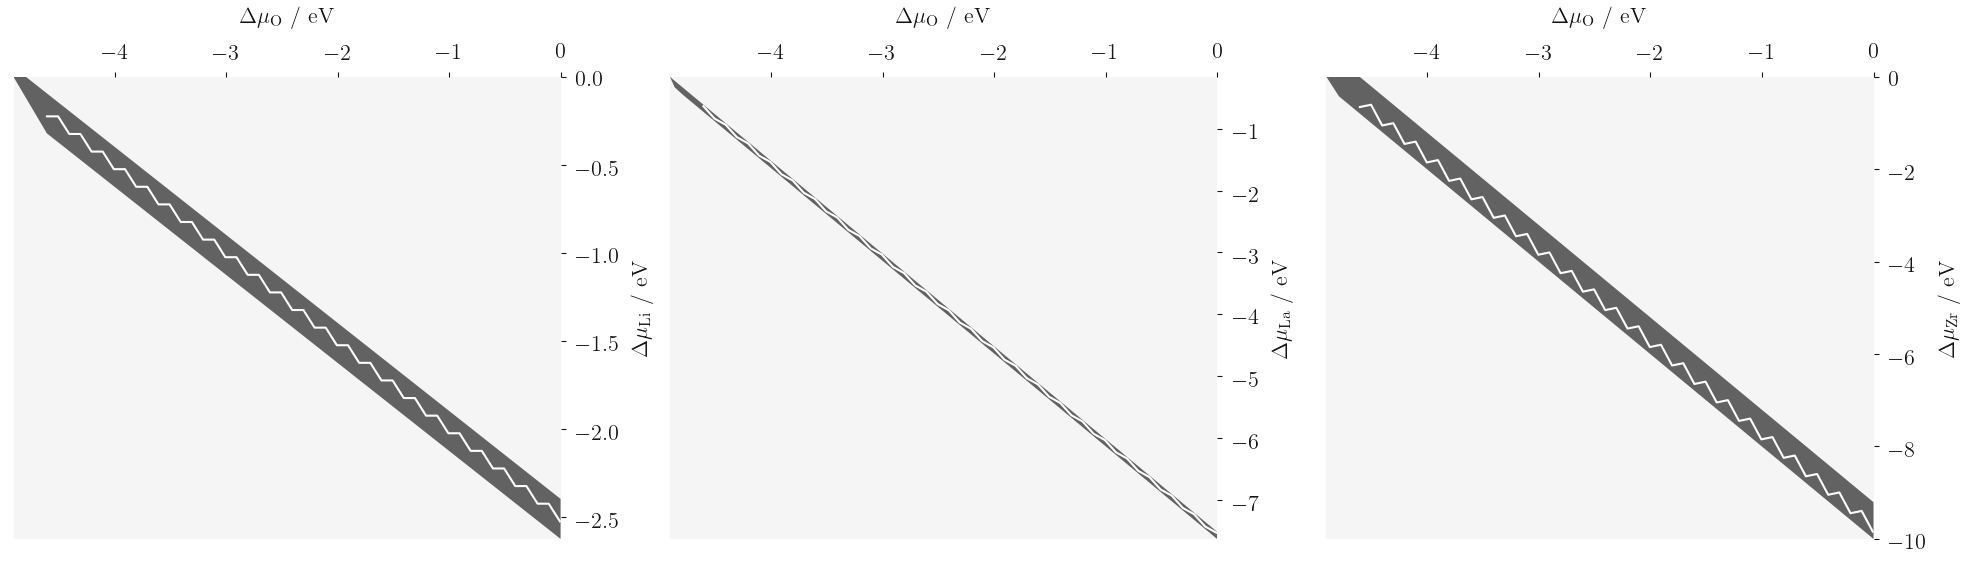

In [7]:
grid = (pd.read_csv('cplap_out/grid.dat', skiprows=10, sep='\s+'))  # 'grid' refers to a stability region divded into a grid of approximatley 80 points
unique_O=grid[10:-2].groupby('mu_La').min().reset_index()
fig, axs = plt.subplots(1,3, figsize =(24,6))

li_plot = axs[0]
la_plot = axs[1]
zr_plot = axs[2]

ax = axs[0]
stab_ax('mu_O','mu_Li',ax)
ax.set_ylabel('$\Delta\mu_\mathrm{Li}$ / eV')
ax.set_xlabel('$\Delta\mu_\mathrm{O}$ / eV')
ax.plot(unique_O['mu_O'],unique_O['mu_Li'],zorder=20,color='white')

ax = axs[1]
stab_ax('mu_O','mu_La',ax)
ax.set_xlabel('$\Delta\mu_\mathrm{O}$ / eV')
ax.set_ylabel('$\Delta\mu_\mathrm{La}$ / eV')
ax.plot(unique_O['mu_O'],unique_O['mu_La'],zorder=20,color='white')

ax = axs[2]
stab_ax('mu_O','mu_Zr',ax)
ax.set_ylabel('$\Delta\mu_\mathrm{Zr}$ / eV')
ax.set_xlabel('$\Delta\mu_\mathrm{O}$ / eV')
ax.plot(unique_O['mu_O'],unique_O['mu_Zr'],zorder=20,color='white')

plt.savefig('../figures/anno_stability_region.pdf')
plt.show()